# Importing Jupyter modules

In [1]:
from IPython.display import display

# Importing Modules

In [2]:
import pandas as pd
import keras

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/opt/anaconda3/envs/ktf-cv3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
train_df = pd.read_csv("data/train.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test_df = pd.read_csv("data/test.csv")
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
to_drop = ["PassengerId", "Name", "Ticket", "Cabin", "Fare"]

In [8]:
# train2 = train_df.drop(to_drop)
# test2 = test_df.drop(to_drop)

In [9]:
train2 = train_df.drop(to_drop, axis=1)
test2 = test_df.drop(to_drop, axis=1)

In [10]:
train2.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C


In [11]:
test2.head(2)

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,male,34.5,0,0,Q
1,3,female,47.0,1,0,S


In [12]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    889 non-null object
dtypes: float64(1), int64(4), object(2)
memory usage: 48.8+ KB


In [13]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 19.7+ KB


# Complete Embarked

In [14]:
train2[train2["Embarked"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
61,1,1,female,38.0,0,0,NaN
829,1,1,female,62.0,0,0,NaN


# Fill with highest embarked

In [15]:
most_embarked = train2["Embarked"].mode()[0]
most_embarked

'S'

In [16]:
train2["Embarked"] = train2["Embarked"].fillna(most_embarked)

In [17]:
train2[train2["Embarked"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked


# Age

In [18]:
train2[train2["Age"].isnull()==True]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
5,0,3,male,NaN,0,0,Q
17,1,2,male,NaN,0,0,S
19,1,3,female,NaN,0,0,C
26,0,3,male,NaN,0,0,C
28,1,3,female,NaN,0,0,Q
29,0,3,male,NaN,0,0,S
31,1,1,female,NaN,1,0,C
32,1,3,female,NaN,0,0,Q
36,1,3,male,NaN,0,0,C
42,0,3,male,NaN,0,0,C


In [19]:
test2[test2["Age"].isnull()==True]

,Pclass,Sex,Age,SibSp,Parch,Embarked
10,3,male,NaN,0,0,S
22,1,female,NaN,0,0,S
29,3,male,NaN,2,0,C
33,3,female,NaN,1,2,S
36,3,female,NaN,0,0,S
39,3,male,NaN,0,0,S
41,1,male,NaN,0,0,S
47,3,male,NaN,0,0,Q
54,2,male,NaN,0,0,C
58,3,male,NaN,1,0,S


# Function to fill Age
Because both train and test have missing ages

In [20]:
def fill_age(df):
    for s in ["male", "female"]:
            for c in [1, 2, 3]:
                truth_table = (df["Sex"] == s) & (df["Pclass"] == c)
                temp_df = df[truth_table]["Age"].dropna()
                median_age = temp_df.median()
                df.loc[(df.Age.isnull()) & (df.Sex == s) & (df.Pclass == c),"Age"] = median_age

In [21]:
fill_age(train2)
fill_age(test2)

# Correlation Plot

In [22]:
def show_corr(df):
    _, ax = plt.subplots(figsize=(8,6))

    # Colormap : Colors to denote correlation values
    cmap = sns.diverging_palette(250 , 10, s=68, l=40, as_cmap = True )

    # Plotting heatmap using seaborn
    sns.heatmap(df.corr(), cmap=cmap, vmin=-1, vmax=1, annot=True)

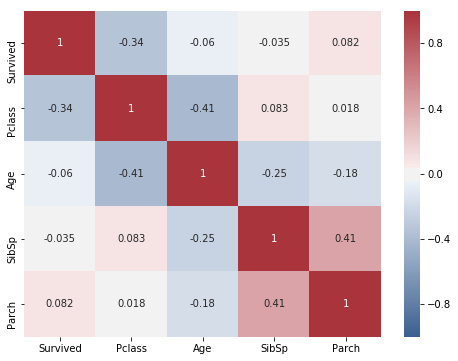

In [23]:
show_corr(train2)

# Convert features to numerical
For now do not use one-hot encoding

In [25]:
num_mapper = {
                "Embarked" : {'C' : 1, 'S': 2, 'Q' : 3},
                "Sex"      : {'male' : 1, 'female': 2},
            }
train2 = train2.replace(num_mapper)
test2 = test2.replace(num_mapper)

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

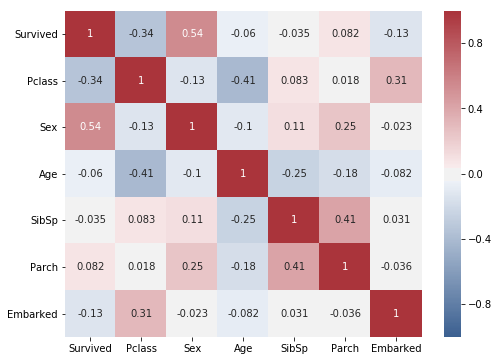

In [26]:
show_corr(train2)

In [27]:
train2_x = train2.drop(["Survived"], axis=1)
train2_x.tail()

,Pclass,Sex,Age,SibSp,Parch,Embarked
886,2,1,27.0,0,0,2
887,1,2,19.0,0,0,2
888,3,2,21.5,1,2,2
889,1,1,26.0,0,0,1
890,3,1,32.0,0,0,3


In [30]:
train2_y = train2["Survived"]
train2_y.tail()

886    0
887    1
888    0
889    1
890    0
Name: Survived, dtype: int64

# Importing Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state = 12)
clf_rf.fit(train2_x, train2_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=12, verbose=0, warm_start=False)

In [32]:
clf_rf.score(train2_x, train2_y)

0.9259259259259259

In [33]:
def kgl_submit_csv(df, predictions, savename = "my_predictions.csv", save=False):
    print("Number of predictions:", len(predictions))
    print("Number of passengers", len(df["PassengerId"]))
    
    kgl_df = pd.DataFrame({
        "PassengerId" : df["PassengerId"],
        "Survived" : predictions
    })
    
    if save:
        kgl_df.to_csv(savename, index=False)
    
    return kgl_df

In [37]:
predictions2 = clf_rf.predict(test2)

In [38]:
a = kgl_submit_csv(test_df, predictions2, savename= "pred2.csv", save=True)

Number of predictions: 418
Number of passengers 418


# Verdict
.  
.  
.  
.  
.  
.  
.  
.  
.  
74.641